#### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import os

#### Merge the 12 months of sales data into a single csv file

In [2]:
df = pd.read_csv("Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir("Sales_Data")]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("Sales_Data/" + file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index = False)

#### Read in Updated Dataframe

In [3]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Clean up the data

#### Drop Nan

In [4]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
all_data=all_data.dropna(how='all')

#### Find Or and delete it

In [8]:
temp_Data = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [9]:
all_data= all_data[all_data['Order Date'].str[0:2] != 'Or']

#### Convert Columns into the correct data type

In [10]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

#### Augment Data with Additional Columns

In [11]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month']=all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add a sales column

In [12]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

all_data.head()

#### Add a city column

In [25]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + " (" + get_state(x) + ")")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


#### What was the best month for sales and how much was earned in that month ?


In [16]:
results = all_data.groupby('Month').sum()

<function matplotlib.pyplot.show(close=None, block=None)>

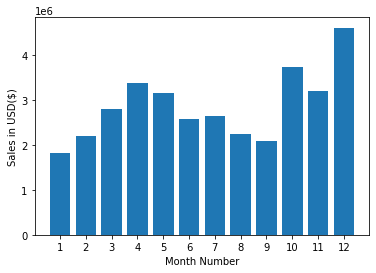

In [21]:
import matplotlib.pyplot as plt
 
months= range(1,13)

plt.bar(months , results['Sales'])
plt.xticks(months)
plt.ylabel("Sales in USD($)")
plt.xlabel("Month Number")
plt.show

#### What city had the highest number of sales

In [27]:
results = all_data.groupby("City").sum()

results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


<function matplotlib.pyplot.show(close=None, block=None)>

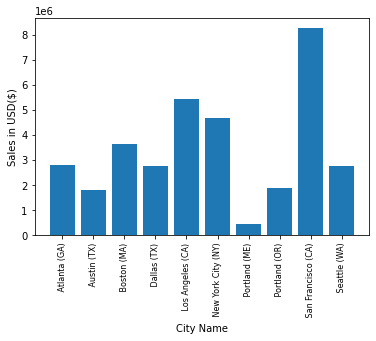

In [32]:
import matplotlib.pyplot as plt
 
cities= [city for city, df in all_data.groupby('City')]
plt.bar(cities , results['Sales'])
plt.xticks(cities, rotation = 'vertical', size =8)
plt.ylabel("Sales in USD($)")
plt.xlabel("City Name")
plt.show

#### What time should we display advertisements to maximize likelihood of customer's buying product?

In [33]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [35]:
all_data['Hour'] = all_data['Order Date'].dt.hour

In [37]:
all_data['Minute'] = all_data['Order Date'].dt.minute

In [38]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


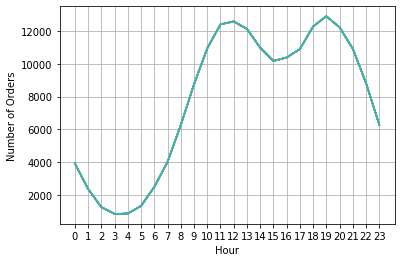

In [45]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours , all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Number of Orders')

plt.show()

#recommendation is around 11am or 7pm

#### What product sold the most and why do you think so?

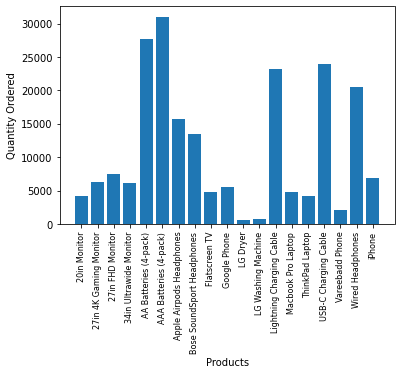

In [48]:
product_group = all_data.groupby('Product')

product_group.sum()

quantity_ordered = product_group.sum()['Quantity Ordered']

products = [ product for product, df in product_group]

plt.bar(products , quantity_ordered)
plt.xticks(products, rotation = 'vertical', size =8)
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_10340\1078864122.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical',size =8)


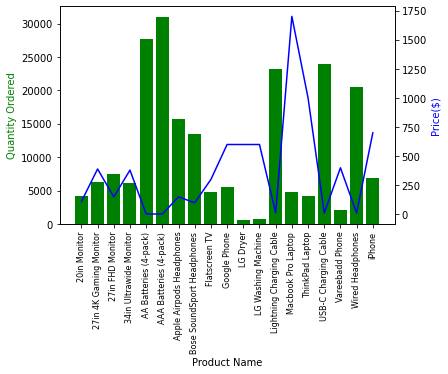

In [53]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered,color='g')
ax2.plot(products, prices , 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price($)', color='b')
ax1.set_xticklabels(products, rotation='vertical',size =8)

plt.show()